In [ ]:
import pandas as pd
data = pd.read_csv("../data.csv")
data.columns = ["URL", "Text", "Start-Indices", "End-Indices", "Text-Type"]
#data["Text-Type"] = 5
data.head()

,URL,Text,Start-Indices,End-Indices,Text-Type
0,keras implementation,: rate for enforcing the constraint: weights w...,NaN,NaN,1
1,keras implementation,"2D tensor of shape (num_samples, features).",NaN,NaN,1
2,keras implementation,"3D tensor of shape (num_samples, n, features)",NaN,NaN,1
3,keras implementation,"4D tensor with shape: (samples, channels, rows...",NaN,NaN,1
4,keras implementation,"5D tensor with shape: (samples, channels, dim1...",NaN,NaN,1


In [ ]:
trainDF = pd.DataFrame()
trainDF['text'] = data["Text"]
trainDF['label'] = data["Text-Type"]

In [ ]:
import gensim
from nltk.tokenize import TweetTokenizer
tw = TweetTokenizer()
sentence_corpus=[]
for sentence in trainDF["text"]:
    sentence_corpus.append(tw.tokenize(sentence))

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(sentence_corpus)
sequences = tokenizer_obj.texts_to_sequences(sentence_corpus)

In [ ]:
max_length = max([len(s.split()) for s in data["Text"]])
print(max_length)
data.shape
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
word_index =tokenizer_obj.word_index
review_pad = pad_sequences(sequences,maxlen=max_length)
print(review_pad.shape)
print(len(word_index))

203
(28541, 203)
47031


In [ ]:
model = gensim.models.Word2Vec(sentence_corpus, min_count=1,size=300,workers=4)

In [ ]:
model.train(sentence_corpus, total_examples=len(sentence_corpus), epochs=50)

(33542114, 46050100)

In [ ]:
filename = 'w2vmodeltweety.txt'
model.wv.save_word2vec_format(filename,binary=False)

In [ ]:
import os
import numpy
embeddings_index = {}
f=open(os.path.join('',filename),encoding='utf-8')
vocab = list(model.wv.vocab)
for word in vocab:
    #values=line.split()
    #word=values[0]
    coefs=numpy.asarray(model[word])
    embeddings_index[word]=coefs
f.close()

/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
num_words = len(word_index)+1
EMBEDDING_DIM=300
embedding_matrix=numpy.zeros((num_words,EMBEDDING_DIM))
for word,i in word_index.items():
    if i>num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector
embedding_matrix.shape

(47032, 300)

In [ ]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        if len(word2vec)>0:
            self.dim=len(next(iter(word2vec.values())))
        else:
            self.dim=0
            
    def fit(self, X, y):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in tw.tokenize(X)
        ])

In [ ]:
import numpy as np
w2v_features = []
for row in data["Text"]:
    r = MeanEmbeddingVectorizer(w2v).transform(row)
    w2v_features.append(np.mean(r,axis=0))

In [ ]:
#print((np.mean(r,axis=0)))

In [ ]:
len((tw.tokenize(data["Text"][0])))

23

In [ ]:
a=[1,2,3]
b=[]
b.append(a)
b.append(a)
len(b)

2

In [ ]:
len(w2v_features)

37270

In [ ]:
plt.show()

In [ ]:
w2vfeat = pd.DataFrame(columns = ["vector", "Text-Type"])

In [ ]:
i=0
for row in data["Text"]:
    w2vfeat = w2vfeat.append(pd.Series([w2v_features[i], data["Text-Type"]],index=w2vfeat.columns), ignore_index=True)
    #w2vfeat["vector"]=[w2v_features[i]]
    #w2vfeat["Text-Type"]=data["Text-Type"], index=dfObj.columns 
    i=i+1

In [ ]:
print(w2vfeat.head(1)["vector"])

0    [-0.03674058, 0.30698225, 0.9129723, 0.1011160...
Name: vector, dtype: object


In [ ]:
print(type(model[model.wv.vocab]))

<class 'numpy.ndarray'>


/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
q = np.array(w2v_features)

In [ ]:
type(q)

numpy.ndarray

In [ ]:
import numpy as np
pc0 = []
pc1 = []
pc2 = []
for i,row in data.iterrows():
    r = MeanEmbeddingVectorizer(w2v).transform(row["Text"])
    if(row["Text-Type"]==0):
        pc0.append(np.mean(r,axis=0))
    elif(row["Text-Type"]==1):
        pc1.append(np.mean(r,axis=0))
    else:
        pc2.append(np.mean(r,axis=0))

In [ ]:
from sklearn.preprocessing import StandardScaler
st_arr = StandardScaler().fit_transform(q)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(st_arr)
r#esult = pca.fit_transform(q)

array([[ 0.18903582,  0.7373055 ,  0.2982183 , ..., -0.74831194,
        -0.01734538, -0.42519864],
       [ 0.41636184,  0.1630344 , -0.14784856, ..., -0.32130724,
        -0.08735883,  0.84257853],
       [ 1.6543683 , -0.14840598,  0.02244942, ...,  0.00442413,
        -0.02874316,  1.1355791 ],
       ...,
       [ 0.8403538 ,  0.32910714,  0.29108354, ...,  1.379484  ,
         0.0798557 ,  1.1624078 ],
       [ 0.6096662 ,  1.0579113 ,  0.9691444 , ..., -0.6116503 ,
        -0.15602635, -0.51914734],
       [ 0.17153344,  0.93584704,  0.4122488 , ...,  0.3047849 ,
         0.23094523, -1.3096364 ]], dtype=float32)

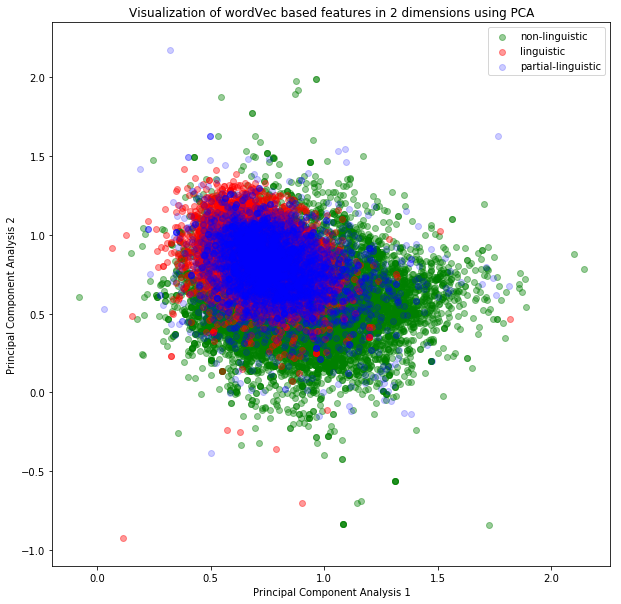

In [ ]:
pca_label0 = np.array(pc0)
pca_label1 = np.array(pc1)
pca_label2 = np.array(pc2)
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(pca_label2[:,0], pca_label2[:,1], c = 'g', alpha = 0.4, label='non-linguistic')
plt.scatter(pca_label0[:,0], pca_label0[:,1], c = 'r', alpha = 0.4, label='linguistic')
plt.scatter(pca_label1[:,0], pca_label1[:,1], c = 'b', alpha = 0.2, label='partial-linguistic')
plt.xlabel('Principal Component Analysis 1')
plt.ylabel('Principal Component Analysis 2')
plt.title('Visualization of wordVec based features in 2 dimensions using PCA')
plt.legend()
#plt.gca().legend(('liguistic','partial-liguistic', 'non-linguistic'))
plt.show()

In [ ]:
X=model[model.wv.vocab]
pcaw = PCA(n_components=2)
result = pca.fit_transform(X)

/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


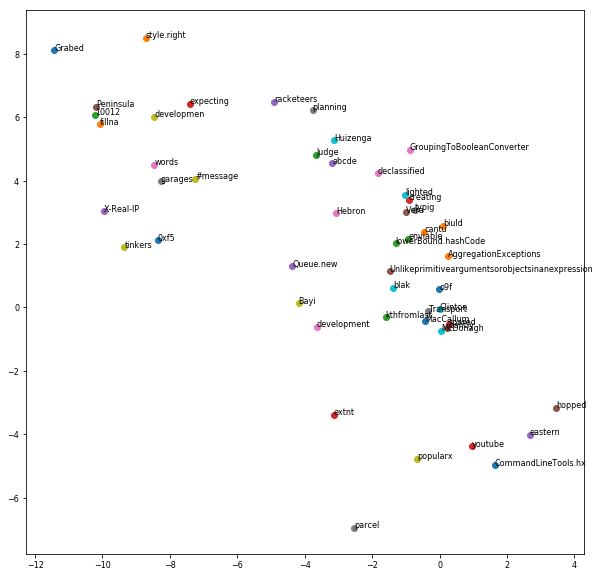

In [ ]:
#plt.figure(figsize=(10,10))
import random
pyplot.rcParams.update({'font.size': 8})
words = list(model.wv.vocab)
#words=['void','public','protected','main','why','how','what','on','the','to','in','of','and']
#words=['finding','Breakthroughs','why','to','query']
#words=words[230:280]
plt.figure(figsize=(10,10))
for i in range(50):
#for word in words:
    word = random.choice(words)
    index = words.index(word)
    #rint(index,word)
    plt.scatter(result[i, 0], result[i, 1])
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    words.remove(word)
pyplot.show()

In [ ]:
model.wv.similar_by_word('public',5)

[('private', 0.4922035038471222),
 ('protected', 0.4300016164779663),
 ('changeFragmentListener', 0.42490890622138977),
 ('extends', 0.41928428411483765),
 ('orderedGroup', 0.4134795665740967)]

In [ ]:
model.wv.similar_by_word('know',5)

[('understand', 0.4453592002391815),
 ('think', 0.4102674722671509),
 ('tshat', 0.401157945394516),
 ('imagine', 0.3903975486755371),
 ('ask', 0.3783981204032898)]